# TUGAS BESAR IF2220 PROBABILITAS DAN STATISTIKA 
Gede Prasidha Bhawarnawa - 13520004
Aditya Prawira Nugroho - 13520049

In [2]:
# INFORMASI UMUM TUGAS DAN SPESIFIKASI
# Pemanggilan library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

data = pd.read_csv('water_potability.csv', index_col=0)
print(data.describe())
print(len(data))

                pH     hardness        solids  chloramines      sulfate  \
count  2010.000000  2010.000000   2010.000000  2010.000000  2010.000000   
mean      7.087193   195.969209  21904.673439     7.134322   333.211376   
std       1.572803    32.643166   8625.397911     1.585214    41.211111   
min       0.227499    73.492234    320.942611     1.390871   129.000000   
25%       6.090785   176.740657  15614.412962     6.138326   307.626986   
50%       7.029490   197.203525  20926.882155     7.142014   332.214113   
75%       8.053006   216.447589  27170.534649     8.109933   359.268147   
max      14.000000   317.338124  56488.672413    13.127000   481.030642   

       conductivity  organicCarbon  trihalomethanes    turbidity   potability  
count   2010.000000    2010.000000      2010.000000  2010.000000  2010.000000  
mean     426.476708      14.357940        66.400717     3.969497     0.402985  
std       80.701872       3.325770        16.081109     0.780471     0.490620  
min 

In [5]:
# NOMOR 1
# Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
# numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
# maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

# Catatan : Jika menggunakan Visual Studio Code untuk membuka file ini, maka mungkin dibutuhkan sebuah text editor terpisah untuk menampilkan semua hasil perhitungan
print("Jawaban Nomor 1:")
print("Pilihan kolom yang dapat diperiksa ", end="")
for columnName in data.columns[:-2]:
    print(columnName, end=", ")
print(data.columns[-2])
idxColumn = input("Masukkan nama kolom yang ingin dicari deskripsi statistikanya: ")
hasOutputResult = False
while not(hasOutputResult):
    if idxColumn in data.columns[:-1]:
        hasOutputResult = True
        print("Berikut adalah data deskripsi statistika dari kolom {}:".format(idxColumn))
        print("Mean: {mean}".format(mean=data[idxColumn].mean()))
        print("Median: {median}".format(median=data[idxColumn].median()))
        print("Terdapat sejumlah data yang menjadi modus pada kolom data {idxColumn}".format(idxColumn=idxColumn))
        print("Jumlah modusnya adalah {qtyMode} data dengan jumlah occurence sebanyak {occurence} per data".format(qtyMode=len(data[idxColumn].mode()), occurence=(data[idxColumn] == data[idxColumn].mode()[0]).sum()))
        print("Modusnya adalah ", end="")
        for idx in data[idxColumn].mode():
            print(idx, end=", ")
        print("Standar Deviasi: {std}".format(std=data[idxColumn].std()))
        print("Variansi: {var}".format(var=data[idxColumn].var()))
        print("Range: {range}".format(range=data[idxColumn].max() - data[idxColumn].min()))
        print("Nilai Minimum: {min}".format(min=data[idxColumn].min()))
        print("Nilai Maksimum: {max}".format(max=data[idxColumn].max()))
        print("Kuartil 1,2,3: {q1}, {q2}, {q3}".format(q1=data[idxColumn].quantile(0.25), q2=data[idxColumn].quantile(0.5), q3=data[idxColumn].quantile(0.75)))
        print("IQR: {iqr}".format(iqr=data[idxColumn].quantile(0.75) - data[idxColumn].quantile(0.25)))
        print("Skewness: {skew}".format(skew=data[idxColumn].skew()))
        print("Kurtosis: {kurt}".format(kurt=data[idxColumn].kurt()))
        print()
    elif idxColumn == "EXIT": # Jika ingin membatalkan program
        hasOutputResult = True
    else:
        print("Kolom {} tidak ditemukan".format(idxColumn))
        idxColumn = input("Masukkan nama kolom yang ingin dicari deskripsi statistikanya: ")

Jawaban Nomor 1:
Pilihan kolom yang dapat diperiksa pH, hardness, solids, chloramines, sulfate, conductivity, organicCarbon, trihalomethanes, turbidity


Jawaban Nomor 2:
Pilihan kolom yang dapat diperiksa pH, hardness, solids, chloramines, sulfate, conductivity, organicCarbon, trihalomethanes, turbidity


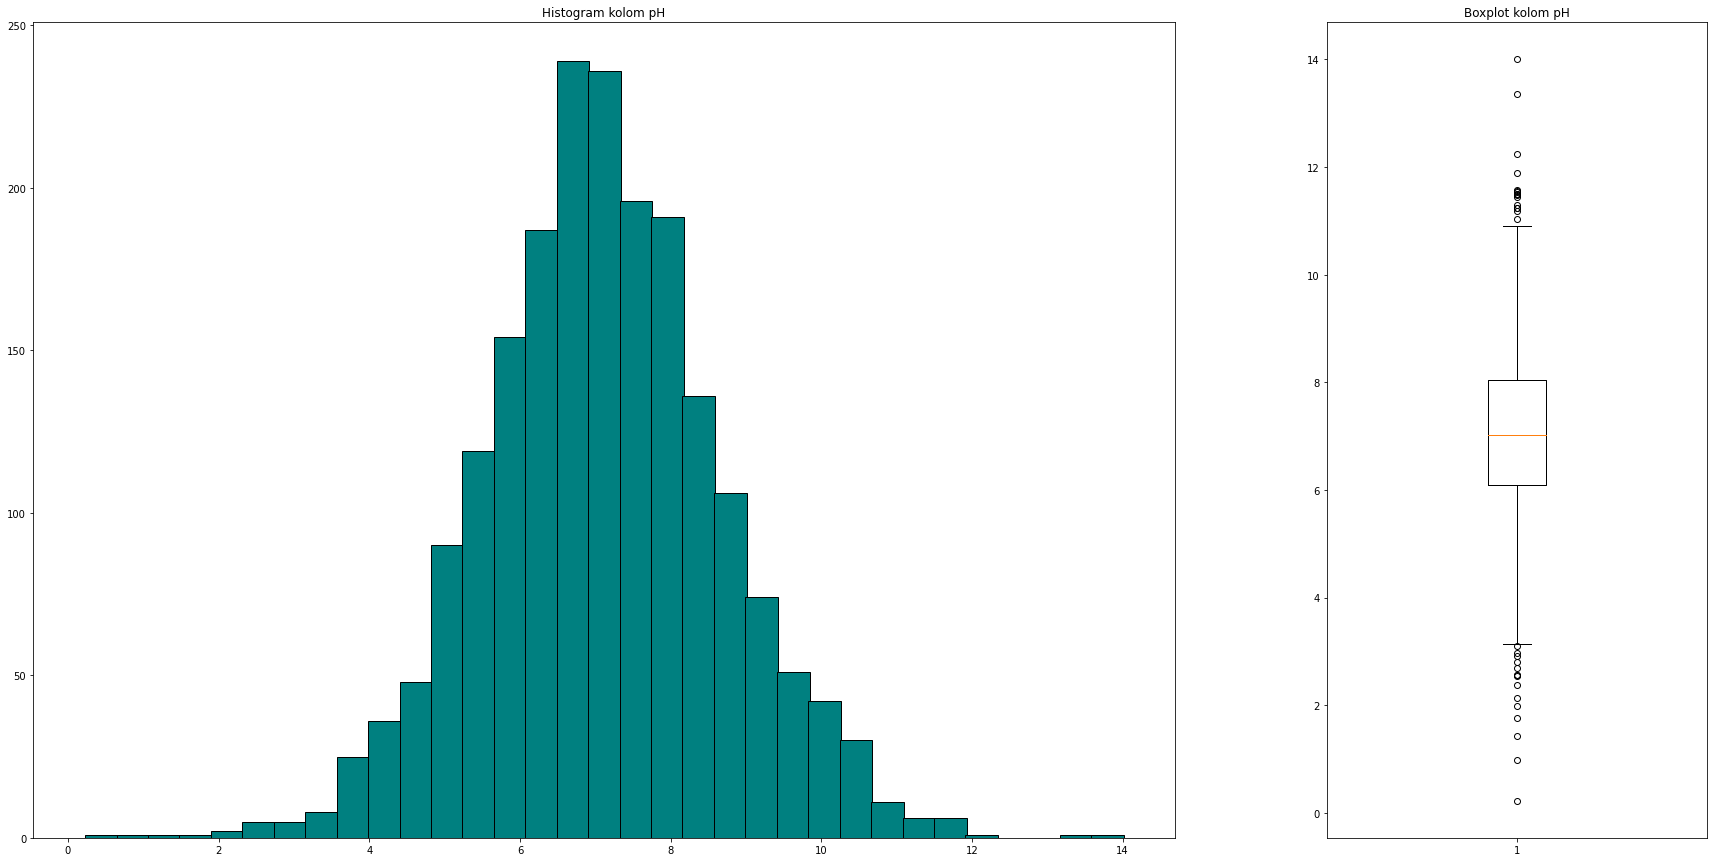

In [29]:
# NOMOR 2
# Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
# kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
# tersebut.
print("Jawaban Nomor 2:")
print("Pilihan kolom yang dapat diperiksa ", end="")
for columnName in data.columns[:-2]:
    print(columnName, end=", ")
print(data.columns[-2])
idxColumn = input("Masukkan nama kolom yang ingin dibuat histogram dan boxplotnya (ketik \"EXIT\" untuk keluar): ")
hasOutputResult = False
figure, axis = plt.subplots(1, 2, figsize=(30, 15), gridspec_kw={'width_ratios': [3, 1]})
while not(hasOutputResult):
    if idxColumn in data.columns:
        hasOutputResult = True
        # Untuk membuat histogram
        # Dimulai dengan menentukan jumlah bin dan width yang tepat dengan menggunakan formula Scott's normal reference rule
        # Alasan penggunaan formula Sturges adalah karena secara implisit diasumsikan data yang dibentuk adalah sebuah distribusi normal
        # Rumus Scott's normal reference rule : h = (3.49 * sigma) / (n ** (1/3))
        # Dengan h adalah width, sigma adalah standar deviasi, dan n adalah jumlah data
        jumlahData = len(data[idxColumn])
        sigma = data[idxColumn].std()
        width = (3.49 * sigma) / (jumlahData ** (1/3))

        axis[0].hist(data[idxColumn].values, bins=math.ceil(data[idxColumn].max() / width), width=width, histtype='bar', ec='black', alpha=0.5)
        axis[0].set_title("Histogram kolom {}".format(idxColumn))

        # Untuk membuat boxplot
        axis[1].boxplot(data[idxColumn])
        axis[1].set_title("Boxplot kolom {}".format(idxColumn))

        plt.show()
        
    elif idxColumn == "EXIT":
        hasOutputResult = True
    else:
        print("Kolom {} tidak ditemukan".format(idxColumn))
        idxColumn = input("Masukkan nama kolom yang ingin dicari histogram dan boxplotnya (ketik \"EXIT\" untuk keluar): ")

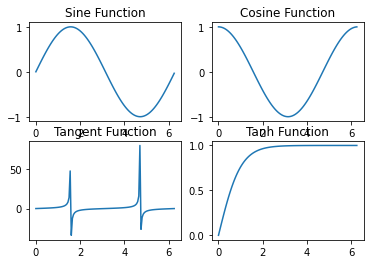

In [20]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(0, math.pi*2, 0.05)
  
# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = np.sin(X)
Y2 = np.cos(X)
Y3 = np.tan(X)
Y4 = np.tanh(X)
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
  
# For Sine Function
axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")
  
# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Cosine Function")
  
# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("Tangent Function")
  
# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Tanh Function")
  
# Combine all the operations and display
plt.show()
